<a href="https://colab.research.google.com/github/vipul43/image_description/blob/main/MutliLabelClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installs

In [144]:
# imports
import scipy.io
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import pandas as pd
from PIL import Image 
import matplotlib.pylab as plt
import pickle
from skimage import transform
from sklearn.model_selection import train_test_split
import tensorflow as tf
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
import spacy
import nltk
import keras.backend as K

In [145]:
nltk.download('wordnet') #lemmatization
lemmatizer = WordNetLemmatizer() #lemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [146]:
# data loading
!gdown --id 1mrjvJq6XNM8QAgajSgrVGpsj8Vrm3BEm #PASCAL50S
mat = scipy.io.loadmat('/content/pascal50S.mat')

Downloading...
From: https://drive.google.com/uc?id=1mrjvJq6XNM8QAgajSgrVGpsj8Vrm3BEm
To: /content/pascal50S.mat
100% 1.12M/1.12M [00:00<00:00, 17.3MB/s]


In [147]:
classes = ['person',
           'bird', 
           'cat', 
           'cow', 
           'dog',
           'horse',
           'sheep', 
           'aeroplane', 
           'bicycle', 
           'boat', 
           'bus', 
           'car', 
           'motorbike', 
           'train', 
           'bottle', 
           'chair', 
           'dining table',
           'potted plant',
           'sofa', 
           'tv/monitor']

dict_classes = {'person':0, 'man':0, 'human':0, 'people':0, 'men': 0, 'girl':0, 'boy':0, 
                    'serviceman':0, 'homo':0, 'valet':0, 'child':0, 'family':0, 'group':0, 
                    'woman':0, 'women':0, 'couple':0, 'her':0, 'his':0, 'rider':0, 'him':0, 
                    'he':0, 'she':0, 'child':0, 'children':0, 'baby':0, 'guy':0, 'gentleman':0,
                    'lady':0, 'grandma':0, 'friend':0, 'mother':0, 'father':0, 'teen':0, 'kid':0,
                    'teenager':0, 'cowboy':0, 'daughter':0, 'dad':0, 'son':0,
                'bird':1, 'penguin':1, 'parrot':1, 'sparrow':1, 'dame':1, 'boo':1, 'eagle':1, 
                    'cockatoo':1, 'hummingbird':1, 'duck':1, 'goose':1, 'songbird':1, 'dove':1,
                    'chicken':1, 'rooster':1, 'chick':1, 'crow':1, 'hawk':1, 'canary':1, 'peacock':1,
                    'magpie':1, 'swan':1, 'kingfisher':1, 'kookaburra':1, 'owl':1, 'woodpecker':1,
                    'crane':1,
                'cat':2, 'pussy':2, 'kitty':2, 'wildcat':2, 'kitten':2,
                'cow':3, 'calf':3, 'bullock':3, 'bull':3, 'ox':3,
                'dog':4, 'greyhound':4, 'pug':4, 'puppy':4, 'schnauzer':4, 'pooch':4, 'tyke':4,
                    'labrador':4, 'bulldog':4, 'chihuahua':4, 'pomeranian':4, 'bernard':4, 'bitch':4,
                'horse':5, 'stallion':5, 'pony':5, 'mare':5,
                'sheep':6, 'goat':6, 'ram':6, 'ewe':6, 'lamb':6,
                'aeroplane':7, 'airplane':7, 'flight':7, 'plane':7, 'jet':7, 'aircraft':7, 'biplane':7,
                'bicycle':8, 'cycle':8, 'bike':8, 
                'boat':9, 'ship':9, 'cruise':9, 'canoe':9, 'kayak':9, 'barge':9,
                'bus':10, 'van': 10,
                'car':11, 'corvette':11, 'truck':11, 'supercar':11, 'coupe':11, 'sedan':11, 'roadster':11,
                    'hatchback':11, 'minivan':11,
                'motorbike':12, 'motorcycle':12,
                'train':13, 'locomotive':13, 'freight':13,
                'bottle':14, 'flask':14,
                'chair':15, 'armchair':15, 'rocker':15, 'recliner':15,
                'dining':16, 'table':16,
                'plant':17, 'sapling':17, 'flowerpot':17, 'potted':17,
                'sofa':18, 'couch':18, 'lounge':18,
                'tv':19, 'monitor':19, 'television':19, 'desktop':19, 'computer':19}

rever_dict_classes = {
            0: 'person',
            1: 'bird',
            2: 'cat',
            3: 'cow',
            4: 'dog',
            5: 'horse',
            6: 'sheep',
            7: 'aeroplane',
            8: 'bicycle',
            9: 'boat',
            10: 'bus',
            11: 'car',
            12: 'motorbike',
            13: 'train',
            14: 'bottle',
            15: 'chair',
            16: 'dining table',
            17: 'potted plant',
            18: 'sofa',
            19: 'tv/monitor'}

In [148]:
count = {'person':0,   #person
           'bird':0, #bird
           'cat':0, #cat
           'cow':0, #cow
           'dog':0, #dog
           'horse':0, #horse
           'sheep':0, #sheep
           'aeroplane':0, #aeroplane
           'bicycle':0, #bicycle
           'boat':0, #boat
           'bus':0, #bus
           'car':0, #car
           'motorbike':0, #motorbike
           'train':0, #train
           'bottle':0, #bottle
           'chair':0, #chair
           'dining table':0, #dining table
           'potted plant':0, #potted plant
           'sofa':0, #sofa
           'tv/monitor':0} #tv/monitor

In [149]:
# observing data
data = []
idx=0
for sample in mat["train_sent_final"][0]:
  link = [sample[0][0]] #image link
  cls = set()
  for k in sample[1]:
    for sent in k:
      for word in sent[0].split():
        pre_word = lemmatizer.lemmatize(word.lower())
        if(pre_word in dict_classes.keys()):
          cls.add(dict_classes[pre_word])
  for cl in cls:
    count[classes[cl]]+=1
  data.append([link, list(cls)])

In [150]:
count

{'aeroplane': 72,
 'bicycle': 104,
 'bird': 71,
 'boat': 62,
 'bottle': 41,
 'bus': 65,
 'car': 131,
 'cat': 62,
 'chair': 108,
 'cow': 70,
 'dining table': 159,
 'dog': 84,
 'horse': 59,
 'motorbike': 57,
 'person': 723,
 'potted plant': 49,
 'sheep': 66,
 'sofa': 95,
 'train': 64,
 'tv/monitor': 77}

In [151]:
# preprocessing the dataset
'''
data -> url -> image -> array -> resized array
TrainX = array of images resized to (224x224x3)
TrainY = array of labels with size (20x1) in ones-zeros vector like [1, 1, 0, ....]
'''
# TrainX
new_shape = (224, 224, 3)
TrainX = []
for point in data:
  photo = io.imread(point[0][0])
  photo = transform.resize(image=photo, output_shape=new_shape)
  TrainX.append(photo)
TrainX = np.array(TrainX)

In [152]:
# TrainY
TrainY = []
for points in data:
  full_label = np.zeros(shape=(20, ))
  for label in points[1]:
    full_label[label] = 1
  TrainY.append(full_label)
TrainY = np.array(TrainY)

In [153]:
# data splitting
'''
train size: 700 images
val size: 300 images
output: TrainX, TrainY, ValX, ValY
'''
TrainX, ValX, TrainY, ValY = train_test_split(TrainX, TrainY, test_size=0.3, random_state=1)
print("Train X shape: ", TrainX.shape)
print("Train Y shape: ", TrainY.shape)
print("Val X shape: ", ValX.shape)
print("Val Y shape: ", ValY.shape)

Train X shape:  (700, 224, 224, 3)
Train Y shape:  (700, 20)
Val X shape:  (300, 224, 224, 3)
Val Y shape:  (300, 20)


Model: "modelV1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
norm1 (BatchNormalization)   (None, 25088)             100352    
_________________________________________________________________
dense1 (Dense)               (None, 192)               4817088   
_________________________________________________________________
norm2 (BatchNormalization)   (None, 192)               768       
_________________________________________________________________
dense2 (Dense)               (None, 84)                1621

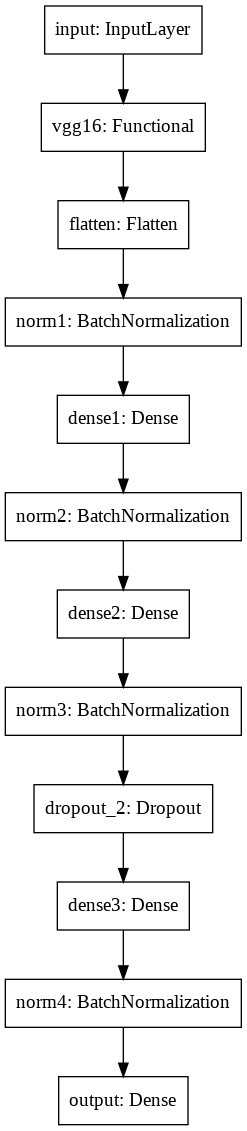

In [154]:
# model making
# input layer
input = tf.keras.Input(shape=(224, 224, 3), name='input')

# Transfer Learning with VGG16 model with weights as imagenet
vgg16 = tf.keras.applications.VGG16(include_top=False, weights="imagenet")
vgg16.trainable = False
x = vgg16(input)

# Dense Layers
x = tf.keras.layers.Flatten(name='flatten')(x)
x = tf.keras.layers.BatchNormalization(name='norm1')(x)
x = tf.keras.layers.Dense(192, activation='relu', name='dense1')(x)
x = tf.keras.layers.BatchNormalization(name='norm2')(x)
x = tf.keras.layers.Dense(84, activation='relu', name='dense2')(x)
x = tf.keras.layers.BatchNormalization(name='norm3')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation='relu', name='dense3')(x)
x = tf.keras.layers.BatchNormalization(name='norm4')(x)

#Output layer
output = tf.keras.layers.Dense(20, activation="sigmoid", name='output')(x)

model = tf.keras.models.Model(inputs=input, outputs=output, name='modelV1')

model.summary()

tf.keras.utils.plot_model(model, to_file="model1.png")

In [155]:
# config cell
LR = 0.003
EPOCHS = 100
BATCH_SIZE = 32
LOSS = tf.keras.losses.BinaryCrossentropy()
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=LR)
METRICS = [tf.keras.metrics.BinaryAccuracy()]
CALLBACKS = [tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.2,patience=5,verbose=1)]

In [156]:
# model compiling
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)

In [157]:
# training
history = model.fit(TrainX, TrainY, batch_size=BATCH_SIZE, validation_data=(ValX, ValY), epochs=EPOCHS, callbacks=CALLBACKS)

Epoch 1/100
22/22 [==============================] - 6s 192ms/step - loss: 0.7801 - binary_accuracy: 0.5439 - val_loss: 0.9057 - val_binary_accuracy: 0.5372
Epoch 2/100
22/22 [==============================] - 4s 177ms/step - loss: 0.5613 - binary_accuracy: 0.7394 - val_loss: 0.5467 - val_binary_accuracy: 0.7875
Epoch 3/100
22/22 [==============================] - 4s 177ms/step - loss: 0.3965 - binary_accuracy: 0.8965 - val_loss: 0.3163 - val_binary_accuracy: 0.9097
Epoch 4/100
22/22 [==============================] - 4s 178ms/step - loss: 0.2458 - binary_accuracy: 0.9357 - val_loss: 0.2508 - val_binary_accuracy: 0.9197
Epoch 5/100
22/22 [==============================] - 4s 179ms/step - loss: 0.1752 - binary_accuracy: 0.9427 - val_loss: 0.2417 - val_binary_accuracy: 0.9193
Epoch 6/100
22/22 [==============================] - 4s 178ms/step - loss: 0.1405 - binary_accuracy: 0.9527 - val_loss: 0.2376 - val_binary_accuracy: 0.9200
Epoch 7/100
22/22 [==============================] - 4s 17

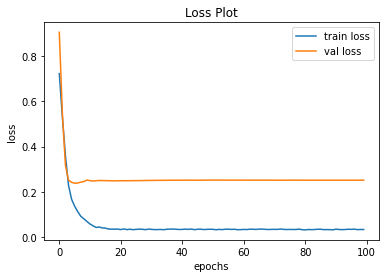

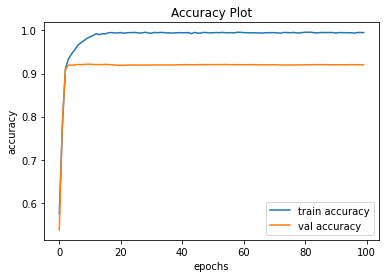

In [158]:
# plotting curves
'''
loss -> train, val
accuracy -> train, val
'''
plt.plot(list(history.history.values())[0])
plt.plot(list(history.history.values())[2])
plt.title('Loss Plot')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train loss', 'val loss'])
plt.show()

plt.plot(list(history.history.values())[1])
plt.plot(list(history.history.values())[3])
plt.title('Accuracy Plot')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train accuracy', 'val accuracy'])
plt.show()

True Classes in the image:  ['person', 'bottle', 'chair', 'dining table', 'tv/monitor']
Predicted Classes in the image:  ['person', 'chair', 'dining table']


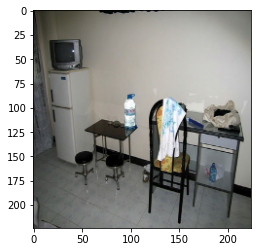

In [172]:
# random predictions on val dataset
rnd = np.random.randint(0, len(ValX))
point = ValX[rnd]
label = ValY[rnd]
pred = model.predict(np.asarray([point]))[0]
pred = (pred > 0.5)
pred = pred.astype(int)
plt.imshow(point)
true = []
approx = []
for i in range(20):
  if label[i] ==1:
    true.append(rever_dict_classes[i])
  if pred[i] ==1:
    approx.append(rever_dict_classes[i])
print("True Classes in the image: ", true)
print("Predicted Classes in the image: ", approx)